# **Predicción de streams de canciones de Spotify.**

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
#Importando las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
# Cargando el dataset
df = pd.read_csv('spotify.csv', encoding='latin1')

# Mostrando información inicial del dataset
df


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [ ]:
df.isnull().sum() #para ver si hay valores nulos

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [ ]:
#Mostrando mayor información del dataset
print(df.info())
print("\n\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

**limpieza de datos**

In [ ]:
# Eliminando duplicados
df = df.drop_duplicates()

# Convertiendo columnas numéricas mal formateadas
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

# Imputando valores faltantes
df['in_deezer_playlists'] = df['in_deezer_playlists'].fillna(df['in_deezer_playlists'].mean())
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(df['in_shazam_charts'].mean())
df.dropna(subset=['streams'], inplace=True)

In [ ]:
df.isnull().sum() #para ver si ya no hay valores nulos

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


**Diagrama de correlación para visualizar los datos más influyentes**

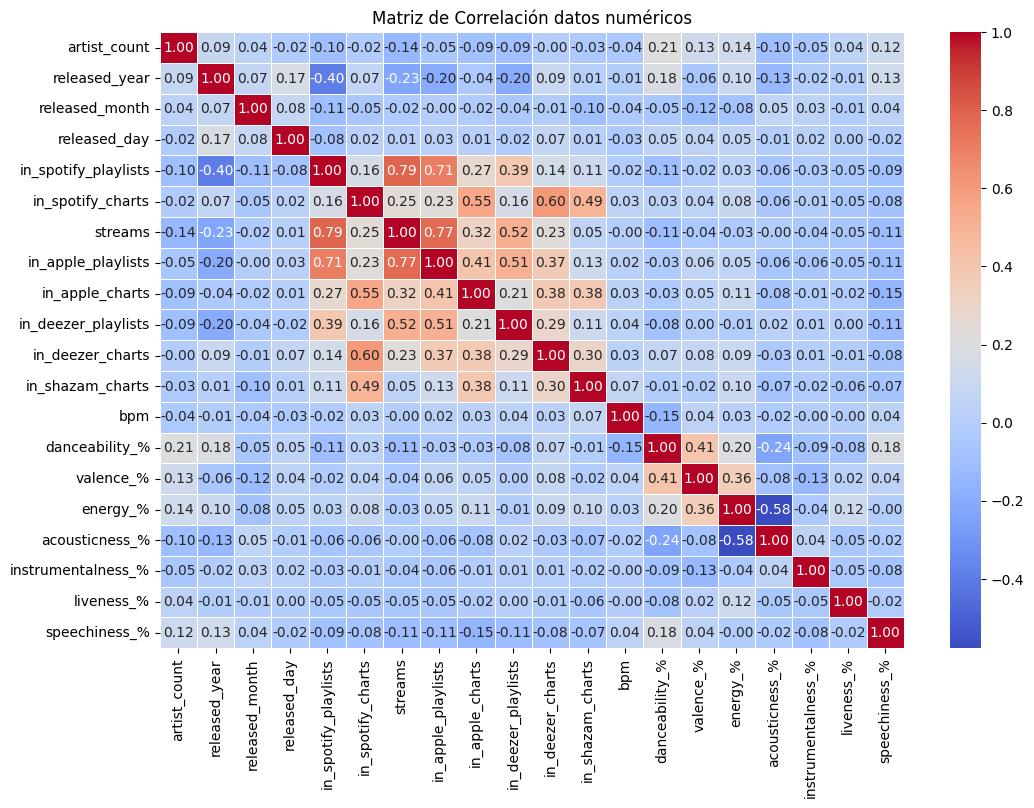

In [ ]:
# Seleccionando variables numéricas para el análisis de correlación
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_features].corr()

# Visualizando la correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación datos numéricos")
plt.show()

Como podemos observar en el mapa de correlación, las variable que mayormente se relacionan son las que se encuentran un poco en el centro, las que tienen que ver con la cantidad de streamings y las plataformas relacionadas a lo mismo.
Como las demás variables tienen un relación muy baja o incluso negativa, entonces consideraré las que s erelacionan mayormente con la reproducción de música.

In [ ]:
# Seleccionar variables predictoras y la variable objetivo
X = df[['in_spotify_playlists', 'in_spotify_charts',
        'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
        'in_deezer_charts', 'in_shazam_charts']]
#y = df['streams'] // transformando la variable objetivo
#se hace la normalización con e fin de normalizar los números muy grandes
y = np.log1p(df['streams'])

In [ ]:
print(X.isnull().sum()) #verificando nuevamente que no tiene valores nulos

in_spotify_playlists    0
in_spotify_charts       0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
dtype: int64


In [ ]:
# Dividiendo los datos en Entrenamiento (80%) y Prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenando el modelo de regresión Lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

RMSE del modelo: 0.72


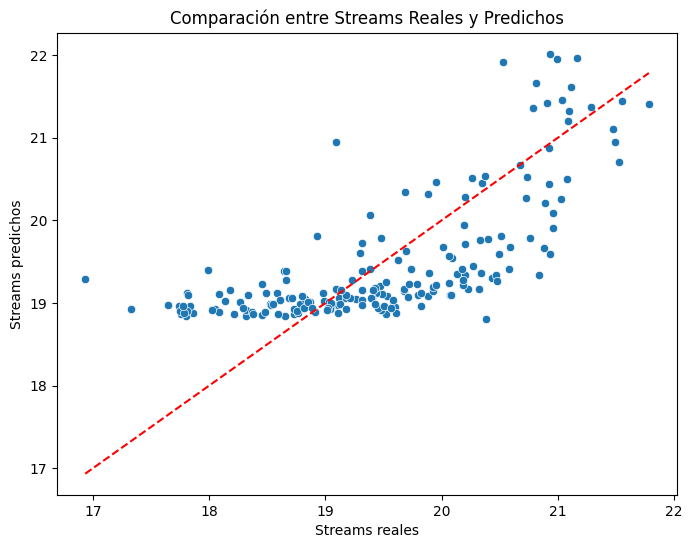

In [ ]:
#Haciendo predicciones
y_pred = modelo.predict(X_test)

# Evaluando el modelo con RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE del modelo: {rmse:.2f}")

#Visualizando resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Línea perfecta
plt.xlabel("Streams reales")
plt.ylabel("Streams predichos")
plt.title("Comparación entre Streams Reales y Predichos")
plt.show()

Como se puede observar el el gráfico, los valores no siguen una dispersión uniforme centrada en la línea de referencia (la de color rojo), incluso, mirando más detalladamente su forma, éstos tienden a ser no lineales, si no más bien un poco exponenciales, por lo que quizá este modelo no sea del todo adecuado para realizar las predicciónes. No obstante, se puede observar que en una parte de la gráfica, la de la derecha, se puede acoplar bien al modelo de regresión lineal.

El error obtenido es relativamente pequeño, pero en este caso es de esta magnitud debido a que normalicé la escala de las reproducciones de streaming, por lo que para conocer el valor real, se necesita volver a su escala original.

In [ ]:
real_error = np.expm1(0.72)  # Volver a la escala original
print(real_error) #error real

1.0544332106438876


In [ ]:
media_y = y.mean()
print(f"Media de y (streams): {media_y}")


Media de y (streams): 19.506648469233518


In [ ]:
real_media = np.expm1(19.5066)  # Volver a la escala original
print(real_media) #error real

296216154.24839145


El anterior es el error real del modelo que es aproximadamente 1.054, el cual, al compararlo con la media de streaming, es mucho menor, por lo que podemos decir que le modelo tiene un buen rendimiento

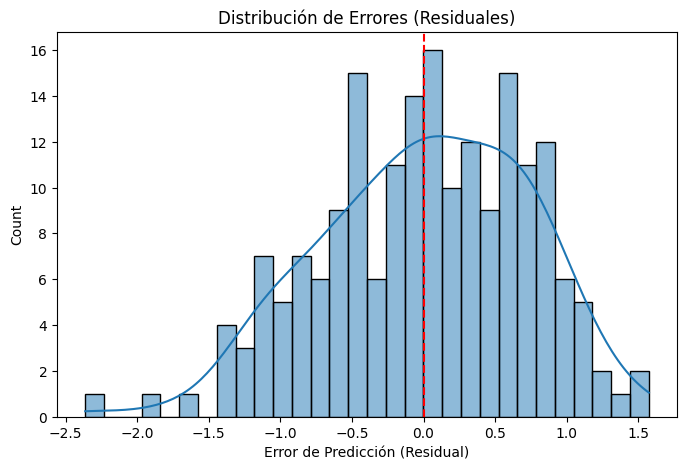

In [ ]:
# Analizando si los errores siguen una distribución normal
residuales = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuales, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Error de Predicción (Residual)")
plt.title("Distribución de Errores (Residuales)")
plt.show()


Los errores tienen una distribución relativamente normal, está un poco sesgada hacia la derecha, posiblemente esto se debe a los orimeros valores observados en la gráfica del modelo de regresión lineal, los cuales no correspondían al modelo.

En conclusión y de acuerdo al modelo realizado, se puede decir que éste funciona bien, aunque quizá si se requiere de mayor presición, se podría hacer uso de otro modelo de machine learning